In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def generate_known_gaussian(dimensions):
    count = 1000
    
    ret = []
    for i in range(count):
        current_vector = []
        for j in range(dimensions):
            g = np.random.normal(0, 1)
            current_vector.append(g)
            
        ret.append(tuple(current_vector))
    return ret

In [3]:
known = generate_known_gaussian(2)

In [4]:
known

[(-3.0614600456181496, -2.749492171305449),
 (-0.1644819275253889, -0.804619700932748),
 (1.209430140062679, 2.341227356290638),
 (1.6271798141404, -0.9488462962536021),
 (0.10881629203145621, -1.1012825964807504),
 (1.0576529794641922, 0.8500115866255757),
 (-0.6546225492940034, -0.2969284181385954),
 (-0.32364348885077593, 0.3990371558908538),
 (1.4832936947847746, -0.16265498222724362),
 (1.7571461308095302, -1.0046362522516226),
 (-0.23154369611131656, 0.7446872076323356),
 (-0.8381886676302421, 0.3320936350283818),
 (2.0727382038124333, 0.3380934831697739),
 (0.39588121717098534, -0.3435023464636292),
 (-0.08111655089041908, 0.22325902319551197),
 (-1.4473625617419392, 2.5254945366504593),
 (0.6330969820465583, -0.31988942305661505),
 (0.6996921648111505, -0.6024791387536559),
 (0.8844198926353443, -0.7283223094326429),
 (-0.4622585417786367, -0.6083150572613916),
 (-1.027263574169435, -1.443823382343635),
 (-0.14601979974588838, -0.04543553021269515),
 (-0.32942686435837454, 0.67

In [5]:
    target_mean = np.matrix([[1.0], [3.0]])
    target_cov = np.matrix([[1.0, 0.7],
                            [0.7, 0.6]])

In [6]:
target_cov

matrix([[ 1. ,  0.7],
        [ 0.7,  0.6]])

In [7]:
[eigenvalues, eigenvectors] = np.linalg.eig(target_cov)

In [8]:
eigenvalues

array([ 1.52801099,  0.07198901])

In [9]:
eigenvectors

matrix([[ 0.79834865, -0.60219551],
        [ 0.60219551,  0.79834865]])

In [10]:
l = np.matrix(np.diag(np.sqrt(eigenvalues)))

In [11]:
l

matrix([[ 1.23612742,  0.        ],
        [ 0.        ,  0.26830768]])

In [12]:
Q = np.matrix(eigenvectors) * l

In [13]:
Q

matrix([[ 0.98686065, -0.16157368],
        [ 0.74439038,  0.21420307]])

In [15]:
x1_tweaked = []
x2_tweaked = []
tweaked_all = []
for i, j in known:
    original = np.matrix([[i], [j]]).copy()
    tweaked = (Q * original) + target_mean

    x1_tweaked.append(float(tweaked[0]))
    x2_tweaked.append(float(tweaked[1]))
    tweaked_all.append(tweaked)

In [35]:
x2_tweaked

[0.13212890839676872,
 2.7052092219272375,
 4.401786261456378,
 4.008011213220835,
 2.8451036844218875,
 3.9693818015384092,
 2.449102289596486,
 2.844557884391781,
 4.069308365448384,
 4.0928065095058015,
 2.9871553878822352,
 2.4471958934236064,
 4.615347050013725,
 3.2211109127734767,
 2.9874403885145226,
 2.463565919197412,
 3.402750007770523,
 3.391791235778912,
 3.5023447860311747,
 2.5255962318102143,
 1.9260434678078546,
 2.8815718350258224,
 2.899547596933118,
 2.663816806496272,
 3.155810616974339,
 2.5197010023738486,
 3.7749290526167503,
 3.7107977935152863,
 3.4298795259350636,
 1.7058609253930337,
 1.889337152320159,
 2.651842391673408,
 3.198925950876177,
 3.977157251761766,
 4.231083803234844,
 3.471073600320791,
 3.525244209001202,
 3.235422538664857,
 1.8174760599163078,
 2.6872542580955496,
 2.8281468563745102,
 3.3864398682836088,
 3.49060758675738,
 3.0619983014105285,
 2.8918479200999876,
 3.8110227553199216,
 2.3437406016802793,
 2.5287214497173838,
 2.5976133257

In [37]:
np.column_stack((x1_tweaked, x2_tweaked))

array([[-1.57698888,  0.13212891],
       [ 0.96768462,  2.70520922],
       [ 1.81525829,  4.40178626],
       ..., 
       [ 0.96923328,  3.52313105],
       [ 0.38089431,  2.60360419],
       [-0.42336238,  1.75169708]])

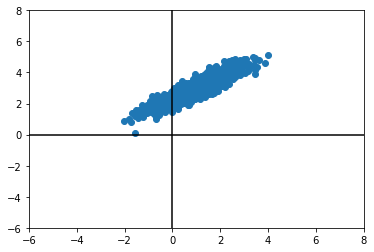

In [40]:
plt.scatter(x1_tweaked, x2_tweaked)
plt.axis([-6, 8, -6, 8])
plt.hlines(0, -6, 8)
plt.vlines(0, -6, 8)
plt.show()